In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import copy

In [120]:
def MidofThree(input_array, left, right):
    mid = (left + right - 1) // 2
    i = input_array[left]
    j = input_array[right-1]
    k = input_array[mid]
    if (i < k < j) or (j < k < i):
        return k, mid
    elif (k < i < j) or (j < i < k):
        return i, left
    else:
        return j, right - 1
    
# https://www.geeksforgeeks.org/quick-sort/
def Partition(input_array, low, high):
    i = low - 1
    pivot, pivot_index = MidofThree(input_array, low, high)     # pivot
    #print('pivot', pivot, ' from ', low, ' to ', high)
    input_array[high], input_array[pivot_index] = input_array[pivot_index], input_array[high] # move pivot to high
    for j in range(low, high):  
        if input_array[j] < pivot: 
            i = i + 1
            #print('swap ', input_array[i], input_array[j])
            input_array[i],input_array[j] = input_array[j],input_array[i] 
            #print(input_array)
    #print(input_array)
    input_array[i+1], input_array[high] = input_array[high], input_array[i+1] # move pivot to mid
    #print(input_array)
    return i + 1

def QuickSort(input_array, low, high, is_first = True):
    #print(high - low + 1)
    time_start = time.time()
    if is_first:
        sort_array = copy.deepcopy(input_array) # sort, but not change orignial array(strange)
    else:
        sort_array = input_array
    if low < high: 
        pi = Partition(sort_array,low,high) 
        #print('pivot= ', sort_array[pi], 'in ', low, ' to ', high)
        #print(sort_array)
        QuickSort(sort_array, low, pi-1, is_first = False) 
        QuickSort(sort_array, pi+1, high, is_first = False) 
    time_finish = time.time()
    time_run = time_finish - time_start
    # check if sort_array is sorted, of course
    #if is_first:
    #    print(sort_array)
    return time_run

def CutSort(input_array, low, high, cutoff = 7, is_first = True):
    #print(high - low + 1)
    time_start = time.time()
    if is_first:
        sort_array = copy.deepcopy(input_array) # sort, but not change orignial array(strange)
    else:
        sort_array = input_array
    if low < high: 
        if high - low <= cutoff:
            #print('cut from ', low, ' to ', high)
            for i in range(low, high+1):
                for j in range(i, low, -1):
                    if sort_array[j] < sort_array[j-1]: 
                        sort_array[j], sort_array[j-1] = sort_array[j-1], sort_array[j]
                    else:
                        break
            #print(sort_array)
        else:
            pi = Partition(sort_array,low,high) 
            #print('pivot= ', sort_array[pi], 'in ', low, ' to ', high)
            #print(sort_array)
            CutSort(sort_array, low, pi-1, is_first = False) 
            CutSort(sort_array, pi+1, high, is_first = False) 
    time_finish = time.time()
    time_run = time_finish - time_start
    # check if sort_array is sorted, of course
    #if is_first:
    #    print(sort_array)
    return time_run

In [121]:
input_1024_0 = np.loadtxt('./data/data0.1024', int)
input_2048_0 = np.loadtxt('./data/data0.2048', int)
input_4096_0 = np.loadtxt('./data/data0.4096', int)
input_8192_0 = np.loadtxt('./data/data0.8192', int)
input_16384_0 = np.loadtxt('./data/data0.16384', int)
input_32768_0 = np.loadtxt('./data/data0.32768', int)

input_1024_1 = np.loadtxt('./data/data1.1024', int)
input_2048_1 = np.loadtxt('./data/data1.2048', int)
input_4096_1 = np.loadtxt('./data/data1.4096', int)
input_8192_1 = np.loadtxt('./data/data1.8192', int)
input_16384_1 = np.loadtxt('./data/data1.16384', int)
input_32768_1 = np.loadtxt('./data/data1.32768', int)

input_data = [input_1024_0, input_1024_1, input_2048_0, input_2048_1, input_4096_0, input_4096_1, \
             input_8192_0, input_8192_1, input_16384_0, input_16384_1, input_32768_0, input_32768_1]

In [122]:
result = []
for i in input_data:
    result.append(QuickSort(i, 0, len(i)- 1))
print(result)

[0.0040132999420166016, 0.003988742828369141, 0.007983684539794922, 0.009945869445800781, 0.01598048210144043, 0.01795816421508789, 0.03687119483947754, 0.03989386558532715, 0.06884574890136719, 0.07879185676574707, 0.14361810684204102, 0.17652297019958496]


In [123]:
quicksort_runtime_0 = []
quicksort_runtime_1 = []
for i in range(0, len(result), 2):
    quicksort_runtime_0.append(result[i])
    quicksort_runtime_1.append(result[i+1])
print(quicksort_runtime_0)

[0.0040132999420166016, 0.007983684539794922, 0.01598048210144043, 0.03687119483947754, 0.06884574890136719, 0.14361810684204102]


In [124]:
result = []
for i in input_data:
    result.append(CutSort(i, 0, len(i)-1))
print(result)

[0.0029904842376708984, 0.00399017333984375, 0.006979942321777344, 0.008010149002075195, 0.011967658996582031, 0.015960216522216797, 0.025897741317749023, 0.038925886154174805, 0.052858829498291016, 0.0718073844909668, 0.11565923690795898, 0.15960454940795898]


In [125]:
cutsort_runtime_0 = []
cutsort_runtime_1 = []
for i in range(0, len(result), 2):
    cutsort_runtime_0.append(result[i])
    cutsort_runtime_1.append(result[i+1])
print(cutsort_runtime_0)

In [126]:
np.savetxt('./result/quicksort runtime 0.txt', quicksort_runtime_0, fmt='%f')
np.savetxt('./result/quicksort runtime 1.txt', quicksort_runtime_1, fmt='%f')
np.savetxt('./result/cutsort runtime 0.txt', cutsort_runtime_0, fmt='%f')
np.savetxt('./result/cutsort runtime 1.txt', cutsort_runtime_1, fmt='%f')

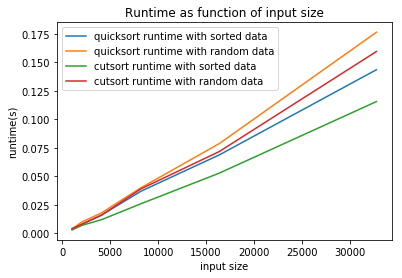

In [127]:
input_size = [1024, 2048, 4096, 8192, 16384, 32768]
plt.figure()
plt.plot(input_size, quicksort_runtime_0, label = 'quicksort runtime with sorted data')
plt.plot(input_size, quicksort_runtime_1, label = 'quicksort runtime with random data')
plt.plot(input_size, cutsort_runtime_0, label = 'cutsort runtime with sorted data')
plt.plot(input_size, cutsort_runtime_1, label = 'cutsort runtime with random data')
plt.legend(loc='upper left')
plt.title('Runtime as function of input size')
plt.xlabel('input size')
plt.ylabel('runtime(s)')
#ax = plt.gca()
#ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.savefig('./result/runtime vs input.jpg')
plt.show()

In [134]:
input_length = len(input_32768_1)
cut_runtime = []
cut_size =[]
for i in range(10, input_length//4, 100):
    cut_size.append(i)
    cut_runtime.append(CutSort(input_32768_1, 0, input_length-1, i))

In [135]:
np.savetxt('./result/cut runtime.txt', cut_runtime, fmt='%f')

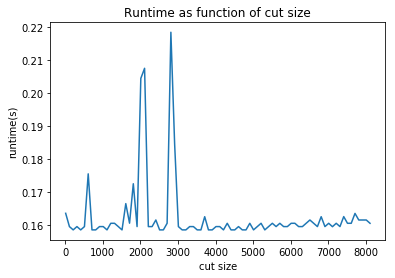

In [136]:
plt.figure()
plt.plot(cut_size, cut_runtime)
#plt.legend(loc='upper left')
plt.title('Runtime as function of cut size')
plt.xlabel('cut size')
plt.ylabel('runtime(s)')
#ax = plt.gca()
#ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.savefig('./result/runtime vs cut.jpg')
plt.show()